## CIFAR 10

In [5]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import numpy as np

In [3]:
x = np.array([1,2,3,4,5])
x = x[:,None]
x.shape

(5, 1)

In [4]:
x = x.flatten()
x.shape

(5,)

You can get the data via: `wget http://pjreddie.com/media/files/cifar.tgz`

In [6]:
from fastai.conv_learner import *
PATH = "data/cifar10/"
os.makedirs(PATH,exist_ok=True)

Use pathlib to see what's inside cifar

In [23]:
from pathlib import Path

In [24]:
PATH1 = Path("data/cifar10")

In [25]:
list(PATH1.iterdir())

[PosixPath('data/cifar10/models'),
 PosixPath('data/cifar10/test'),
 PosixPath('data/cifar10/train_original'),
 PosixPath('data/cifar10/tmp'),
 PosixPath('data/cifar10/labels.txt'),
 PosixPath('data/cifar10/train')]

In [15]:
#train_path = 'data/cifar10/train/deer/29827_deer.png'
#plt.imread(train_path)
images = [str(filename)
          for folder in (PATH1/"train").iterdir() 
          for filename in folder.iterdir()]
images[:2]

['data/cifar10/train/horse/42299_horse.png',
 'data/cifar10/train/horse/40859_horse.png']

In [88]:
x = np.array(plt.imread(images[1]))
x.shape

(32, 32, 3)

In [ ]:
#a = np.empty([32, 32, 3])
a = np.zeros((32,32,3))
for i in images:
    j = plt.imread(i)
    #a.append(j)
    a += j
    

In [91]:
a.

[array([[[0.57647, 0.72549, 0.83137],
         [0.57255, 0.71765, 0.82353],
         [0.57647, 0.72549, 0.82745],
         ...,
         [0.56078, 0.7098 , 0.81176],
         [0.55686, 0.70588, 0.80784],
         [0.56078, 0.7098 , 0.81176]],
 
        [[0.57255, 0.72157, 0.82353],
         [0.56471, 0.7098 , 0.81176],
         [0.56471, 0.7098 , 0.81176],
         ...,
         [0.55686, 0.70196, 0.80392],
         [0.55294, 0.69804, 0.8    ],
         [0.55686, 0.70196, 0.80784]],
 
        [[0.57647, 0.72157, 0.82745],
         [0.56863, 0.71373, 0.81569],
         [0.57255, 0.71765, 0.81961],
         ...,
         [0.56471, 0.7098 , 0.81176],
         [0.56078, 0.70588, 0.80784],
         [0.56471, 0.71373, 0.81569]],
 
        ...,
 
        [[0.58039, 0.60784, 0.54902],
         [0.58039, 0.61569, 0.55294],
         [0.5451 , 0.59608, 0.52941],
         ...,
         [0.54118, 0.6    , 0.54118],
         [0.54902, 0.61176, 0.55294],
         [0.55686, 0.61961, 0.56471]],
 
     

In [12]:
list((PATH1/"train").iterdir())[:20]

[PosixPath('data/cifar10/train/29827_deer.png'),
 PosixPath('data/cifar10/train/48213_ship.png'),
 PosixPath('data/cifar10/train/24551_cat.png'),
 PosixPath('data/cifar10/train/21499_ship.png'),
 PosixPath('data/cifar10/train/1285_bird.png'),
 PosixPath('data/cifar10/train/42299_horse.png'),
 PosixPath('data/cifar10/train/38699_cat.png'),
 PosixPath('data/cifar10/train/40859_horse.png'),
 PosixPath('data/cifar10/train/42059_deer.png'),
 PosixPath('data/cifar10/train/15743_ship.png'),
 PosixPath('data/cifar10/train/3111_frog.png'),
 PosixPath('data/cifar10/train/25993_automobile.png'),
 PosixPath('data/cifar10/train/3532_frog.png'),
 PosixPath('data/cifar10/train/4469_ship.png'),
 PosixPath('data/cifar10/train/30752_automobile.png'),
 PosixPath('data/cifar10/train/44070_bird.png'),
 PosixPath('data/cifar10/train/7704_truck.png'),
 PosixPath('data/cifar10/train/14177_truck.png'),
 PosixPath('data/cifar10/train/14748_dog.png'),
 PosixPath('data/cifar10/train/42666_automobile.png')]

#### How to get mean and std of iamges

In [ ]:
TRAIN = Path("data/cifar10/train_original")
images = (plt.imread(str(i)) for i in TRAIN.iterdir()) # generator comprehension
images = np.stack(images)   
images = np.reshape(images.T, (3,-1)) # images.shape = (3,5120000)

In [ ]:
np.mean(images, axis =1)
np.std(images, axis = 1)

#### 2nd way

In [ ]:
TRAIN = Path("data/cifar10/train_original")
images = (plt.imread(str(i)) for i in TRAIN.iterdir()) # generator comprehension
images = np.stack(images)  # this takes time 
np.mean(images[:,:,:,0]),np.mean(images[:,:,:,1]),np.mean(images[:,:,:,2])
np.std(images[:,:,:,0]),np.std(images[:,:,:,1]),np.std(images[:,:,:,2])

------------------------------

In [13]:
labels = (PATH1/"labels.txt").open()
print(labels.read())

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck



In [26]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [27]:
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

How to get these stats

In [86]:
??tfms_from_stats

Signature: tfms_from_stats(stats, sz, aug_tfms=None, max_zoom=None, pad=0, crop_type=<CropType.RANDOM: 1>, 
                           tfm_y=None, sz_y=None, pad_mode=2, norm_y=True, scale=None)
Source:   
def tfms_from_stats(stats, sz, aug_tfms=None, max_zoom=None, pad=0, crop_type=CropType.RANDOM,
                    tfm_y=None, sz_y=None, pad_mode=cv2.BORDER_REFLECT, norm_y=True, scale=None):
    """ Given the statistics of the training image sets, returns separate training and validation 
    transform functions
    """
    if aug_tfms is None: aug_tfms=[]
    tfm_norm = Normalize(*stats, tfm_y=tfm_y if norm_y else TfmType.NO) if stats is not None else None
    tfm_denorm = Denormalize(*stats) if stats is not None else None
    val_crop = CropType.CENTER if crop_type in (CropType.RANDOM,CropType.GOOGLENET) else crop_type
    val_tfm = image_gen(tfm_norm, tfm_denorm, sz, pad=pad, crop_type=val_crop,
            tfm_y=tfm_y, sz_y=sz_y, scale=scale)
    trn_tfm = image_gen(tfm_norm, tfm_denorm, sz, pad=pad, crop_type=crop_type,
            tfm_y=tfm_y, sz_y=sz_y, tfms=aug_tfms, max_zoom=max_zoom, pad_mode=pad_mode, scale=scale)
    return trn_tfm, val_tfm
File:      ~/Documents/Git/fastai/courses/dl1/fastai/transforms.py
Type:      function


In [28]:
def get_data(sz,bs):
    tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomFlip()], pad=sz//8) 
                                                               #add 4pixels each side
    return ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

In [29]:
bs=256

### Look at data

Data files not in respective class folders.

In [11]:
import os
import glob
import shutil
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
cwd = os.getcwd()
train_path = cwd + '/data/cifar10/train/'

Create folders in training

In [19]:
# go through classes and make a directory for each one
for class_now in classes:
    path_now = train_path + class_now
    if not os.path.exists(path_now):
        os.makedirs(path_now)

In [20]:
for class_now in classes:
    identifier = train_path + '*' + class_now + '.png' # /data/cifar10/train/*airplane.png
    class_files = glob.glob(identifier)
    file_destination = train_path + class_now
    # move all frog files to proper class directory
    for file_to_move in class_files:
        shutil.move(file_to_move, file_destination)

Create folders in test

In [21]:
# do all the same but now for the test data
test_path = cwd + '/data/cifar10/test/'
for class_now in classes:
    path_now = test_path + class_now
    if not os.path.exists(path_now):
        os.makedirs(path_now)
for class_now in classes:
    identifier = test_path + '*' + class_now + '.png'
    class_files = glob.glob(identifier)
    file_destination = test_path + class_now
    for file_to_move in class_files:
        shutil.move(file_to_move, file_destination)

In [27]:
!ls {PATH}/train

airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck


In [28]:
list(PATH1.iterdir())

[PosixPath('data/cifar10/test'),
 PosixPath('data/cifar10/labels.txt'),
 PosixPath('data/cifar10/train')]

Folders created in train folder

In [10]:
list((PATH1/"train").iterdir())

[PosixPath('data/cifar10/train/horse'),
 PosixPath('data/cifar10/train/deer'),
 PosixPath('data/cifar10/train/cat'),
 PosixPath('data/cifar10/train/frog'),
 PosixPath('data/cifar10/train/airplane'),
 PosixPath('data/cifar10/train/bird'),
 PosixPath('data/cifar10/train/truck'),
 PosixPath('data/cifar10/train/ship'),
 PosixPath('data/cifar10/train/dog'),
 PosixPath('data/cifar10/train/automobile')]

Inside train/dog folder

In [31]:
list((PATH1/"train"/"dog").iterdir())[:10]

[PosixPath('data/cifar10/train/dog/14748_dog.png'),
 PosixPath('data/cifar10/train/dog/36487_dog.png'),
 PosixPath('data/cifar10/train/dog/3660_dog.png'),
 PosixPath('data/cifar10/train/dog/46536_dog.png'),
 PosixPath('data/cifar10/train/dog/45705_dog.png'),
 PosixPath('data/cifar10/train/dog/39660_dog.png'),
 PosixPath('data/cifar10/train/dog/35748_dog.png'),
 PosixPath('data/cifar10/train/dog/337_dog.png'),
 PosixPath('data/cifar10/train/dog/34757_dog.png'),
 PosixPath('data/cifar10/train/dog/20348_dog.png')]

get_data() is a wrapper that returns 'ImageClassifierData.from_paths'.  
It returns a batch of 4 32by32 images.

In [30]:
data = get_data(32,4)

Iterate the dataloader so that we can look at the images.

In [31]:
x,y=next(iter(data.trn_dl))

bs, channels, rows, height

Image 0

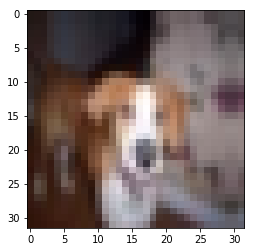

In [44]:
plt.imshow(data.trn_ds.denorm(x)[0]);

Image 1

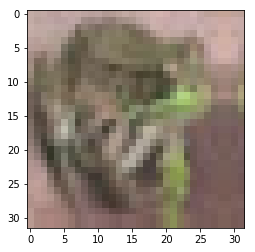

In [35]:
plt.imshow(data.trn_ds.denorm(x)[1]);

## Fully connected model

Build a Dense net for classifying images.

In [17]:
data = get_data(32,bs)

In [18]:
lr=1e-2

From [this notebook](https://github.com/KeremTurgutlu/deeplearning/blob/master/Exploring%20Optimizers.ipynb) by our student Kerem Turgutlu:

A simple 2-layer DenseNet.

In [30]:
class SimpleNet(nn.Module):
    def __init__(self, layers):
        super().__init__()
        # nn.ModuleList() must be used on a 
        # normal list to turn them into torch layers
        self.layers = nn.ModuleList([nn.Linear(layers[i], layers[i + 1]) 
                                      for i in range(len(layers) - 1)])
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        for l in self.layers:
            l_x = l(x)
            x = F.relu(l_x)
        return F.log_softmax(l_x, dim=-1)

#### How the layers are created

Passing in 5 arguments will create a range of 0, 1, 2, 3

In [41]:
layerz = [32*32*3, 40,20,10,5] # input size,filter size, output size
range(len(layerz) - 1)

range(0, 4)

which can be used in a for loop to create 4 linear layers of the correct sizes.

In [43]:
[nn.Linear(layerz[i], layerz[i + 1]) for i in range(len(layerz) - 1)]

[Linear(in_features=3072, out_features=40, bias=True),
 Linear(in_features=40, out_features=20, bias=True),
 Linear(in_features=20, out_features=10, bias=True),
 Linear(in_features=10, out_features=5, bias=True)]

In [22]:
??ConvLearner.from_model_data

Signature: ConvLearner.from_model_data(m, data, **kwargs)
Docstring: <no docstring>
    
class ConvLearner(Learner):
    """
    Class used to train a chosen supported covnet model. Eg. ResNet-34, etc.
    Arguments:
        data: training data for model
        models: model architectures to base learner
        precompute: bool to reuse precomputed activations
        **kwargs: parameters from Learner() class
    """    
Source:   
    @classmethod
    def from_model_data(cls, m, data, **kwargs):
        self = cls(data, BasicModel(to_gpu(m)), **kwargs)
        self.unfreeze()
        return self

Let's create a learner that has 2 layers. Instead of using `fit(Simplenet.cuda(),data,optim.Adam, lr)`, we create a learner which has SGDR, LR finder..etc. The first method will require us to use callbacks in order to enjoy these features.

In [34]:
learn = ConvLearner.from_model_data(SimpleNet([32*32*3, 40,10]), data)

In [36]:
learn

SimpleNet(
  (layers): ModuleList(
    (0): Linear(in_features=3072, out_features=40, bias=True)
    (1): Linear(in_features=40, out_features=10, bias=True)
  )
)

The parameters in the layers are  
3072 X 40 = 122880 weights + 40 bias  
40 X 10 = 400 weights + bias

In [45]:
[o.numel() for o in learn.model.parameters()]

[122880, 40, 400, 10]

Information is also available using .summary().

In [44]:
learn.summary()

OrderedDict([('Linear-1',
              OrderedDict([('input_shape', [-1, 3072]),
                           ('output_shape', [-1, 40]),
                           ('trainable', True),
                           ('nb_params', 122920)])),
             ('Linear-2',
              OrderedDict([('input_shape', [-1, 40]),
                           ('output_shape', [-1, 10]),
                           ('trainable', True),
                           ('nb_params', 410)]))])

#### Training

In [47]:
learn.lr_find()

 75%|███████▌  | 147/196 [01:31<00:30,  1.60it/s, loss=6.77]

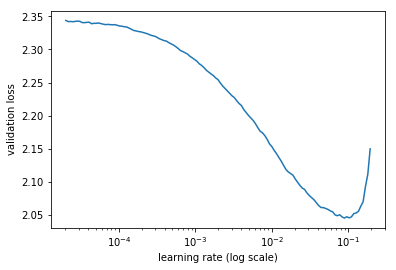

In [48]:
learn.sched.plot()

In [49]:
%time learn.fit(lr, 2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.759363   1.626371   0.4271    
    1      1.684098   1.575762   0.4427                     
CPU times: user 49 s, sys: 15 s, total: 1min 3s
Wall time: 48 s


[array([1.57576]), 0.4427]

In [50]:
%time learn.fit(lr, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                   
    0      1.611521   1.514844   0.4645    
    1      1.597344   1.491126   0.4759                     
CPU times: user 24.2 s, sys: 8.77 s, total: 32.9 s
Wall time: 17.6 s


[array([1.49113]), 0.4759]

## CNN

Create a CNN model next.

nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, 
          padding=0, dilation=1,groups=1, bias=True)    
 
Applies a 2D convolution over an input signal composed of several input planes.

In [8]:
class ConvNet(nn.Module):
    def __init__(self, layers, c): 
        super().__init__()
        self.layers = nn.ModuleList([
            nn.Conv2d(layers[i], layers[i + 1], kernel_size=3, stride=2)
            for i in range(len(layers) - 1)])
        self.pool = nn.AdaptiveMaxPool2d(1) #this declares the output size 
        self.out = nn.Linear(layers[-1], c)
        
    def forward(self, x):
        for l in self.layers:        #  loop through all the layers
            x = F.relu(l(x))         #  override inputs x with the output activations. 
                                     #  Note Relu happens here 
        x = self.pool(x)             #  pool the outputs from the last CNN layer;  [-1, 80, 1, 1]  
        x = x.view(x.size(0), -1)    #  flatten to 2D tensor, keep batch size
                                     #  flattening changes x from [-1, 80, 1, 1] to [-1, 80]
                                     #  Note that [80, 1, 1] to [80] is effectively a np.squeeze 
        
        return F.log_softmax(self.out(x), dim=-1) # x = [bs,80],softmax the 80

**ConvNet([3, 20, 40, 80]** means number of channels in each layer.   
Inputs have the standard **3** channels, followed by CNN layer of **20** channels,...etc.    
ConvNet([   ,    ,     ,   ], 10) means **10** outputs in the final layer.

Suppose you activation input is 28X28, using `nn.AdaptiveMaxPool2d(14)` means that you are doing a 2X2 maxpool. If you use `nn.AdaptiveMaxPool2d(2)` it means you are doing a 14X14 maxpool. So here a `nn.AdaptiveMaxPool2d(1)` means a 28X28 maxpool.

In [25]:
learn = ConvLearner.from_model_data(ConvNet([3, 20, 40, 80], 10), data)

In [62]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 32, 32]),
                           ('output_shape', [-1, 20, 15, 15]),
                           ('trainable', True),
                           ('nb_params', 560)])),
             ('Conv2d-2',
              OrderedDict([('input_shape', [-1, 20, 15, 15]),
                           ('output_shape', [-1, 40, 7, 7]),
                           ('trainable', True),
                           ('nb_params', 7240)])),
             ('Conv2d-3',
              OrderedDict([('input_shape', [-1, 40, 7, 7]),
                           ('output_shape', [-1, 80, 3, 3]),
                           ('trainable', True),
                           ('nb_params', 28880)])),
             ('AdaptiveMaxPool2d-4',
              OrderedDict([('input_shape', [-1, 80, 3, 3]),
                           ('output_shape', [-1, 80, 1, 1]),
                           ('nb_params', 0)])),
             ('Linear-5',
              OrderedDict

In [56]:
learn.lr_find(end_lr=100)

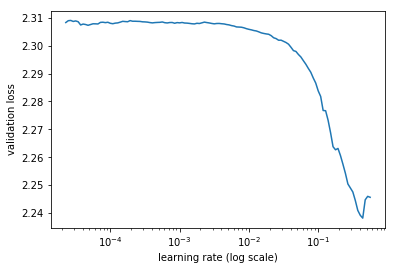

In [57]:
learn.sched.plot()

In [58]:
%time learn.fit(1e-1, 2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.69685    1.580841   0.4166    
    1      1.521899   1.464984   0.4557                     
CPU times: user 25.1 s, sys: 8.39 s, total: 33.5 s
Wall time: 17.9 s


[array([1.46498]), 0.4557]

In [59]:
%time learn.fit(1e-1, 4, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                   
    0      1.366506   1.293354   0.5289    
    1      1.307932   1.23342    0.5605                     
    2      1.264291   1.201246   0.5663                     
    3      1.221219   1.164459   0.5784                     
CPU times: user 49.8 s, sys: 17.1 s, total: 1min 6s
Wall time: 35.7 s


[array([1.16446]), 0.5784]

## Refactored

Join `nn.Conv2d()` + `F.relu()` into `ConvLayer`

In [26]:
class ConvLayer(nn.Module):
    def __init__(self, ni, nf):
        super().__init__()
        self.conv = nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)
        # padding is added so that the corners info are kept (?)
        
    def forward(self, x): return F.relu(self.conv(x))

Some changes made are commented below:

In [27]:
class ConvNet2(nn.Module):
    def __init__(self, layers, c):
        super().__init__()
        self.layers = nn.ModuleList([ConvLayer(layers[i], layers[i + 1]) # Use ConvLayer instead of nn.Conv2d
            for i in range(len(layers) - 1)])
        self.out = nn.Linear(layers[-1], c)
        
    def forward(self, x):
        for l in self.layers: x = l(x)
        x = F.adaptive_max_pool2d(x, 1) # adaptive Max Pooling is just a function, 
                                        # there is no weights inside
                    
            
        x = x.view(x.size(0), -1)       # flatten to (batch size, )
                                        # flattening changes x from 
                                        # [-1, 80, 1, 1] to [-1, 80]
        
        return F.log_softmax(self.out(x), dim=-1)

Build the learner

In [28]:
learn = ConvLearner.from_model_data(ConvNet2([3, 20, 40, 80], 10), data)

In [29]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 32, 32]),
                           ('output_shape', [-1, 20, 16, 16]),
                           ('trainable', True),
                           ('nb_params', 560)])),
             ('ConvLayer-2',
              OrderedDict([('input_shape', [-1, 3, 32, 32]),
                           ('output_shape', [-1, 20, 16, 16]),
                           ('nb_params', 0)])),
             ('Conv2d-3',
              OrderedDict([('input_shape', [-1, 20, 16, 16]),
                           ('output_shape', [-1, 40, 8, 8]),
                           ('trainable', True),
                           ('nb_params', 7240)])),
             ('ConvLayer-4',
              OrderedDict([('input_shape', [-1, 20, 16, 16]),
                           ('output_shape', [-1, 40, 8, 8]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 40, 8, 8]),
                 

In [30]:
%time learn.fit(1e-1, 2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.69756    1.543612   0.4323    
    1      1.513018   1.470446   0.4679                     

CPU times: user 1min 3s, sys: 16.9 s, total: 1min 20s
Wall time: 2min 16s


[array([1.47045]), 0.4679]

In [31]:
%time learn.fit(1e-1, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                   
    0      1.347076   1.27404    0.5423    
    1      1.285686   1.215371   0.5649                     

CPU times: user 25.2 s, sys: 8.49 s, total: 33.7 s
Wall time: 18.2 s


[array([1.21537]), 0.5649]

The problem with this model is that if you try to add more layers to improve performance, you will encounter exploding/vanishing gradient problems. So we need to introduce batchnorm.

## BatchNorm

#### Build the batchnorm conv layer

In each mini batch, normalize each of the activation outputs and  
allow for scaling and shifting at the macro level.  
If you just simply minus the mean from yhe input activations, the weights will learn that it has to get bigger in order to reduce the loss for this minibatch. But in the next minibatch, it will encounter the same thing (mean and std for each minibatch are diferent), so the weights will grow bigger again. If this continues, the weights will keep growing while the loss stays the same, because the two forces are cancelling out each other. This is what is called a covariate shift (?). In order to prevent this, we have to introduce 2 new parameters `self.a` and `self.m`, which will scale and shift the outputs on behalf of the the weights. 

Since the mean and std of each minibatch are different, the meanings of each filter are also changing slightly, akin to adding noise, which gives rise to an accidental regularization effect.

Note that batchnorm is turned off during test because we don't want to change the input activations in an inconsistent manner. Imagine if reordering the test set and sending the minibatches in a different order. Since each minibatch will produce a different mean and std, this means that the predictions will be different for the same image, depending on which minibatch it is in. This is like leaving dropout on during test time, which will give you different predictions for the same input image, since dropouts are randomly mask.

Also, during finetuning a pretrained model, Jeremy discovered that it's better to freeze batchnorm as well, especailly if the new image data is similiar to imagenet data.

In [19]:
class BnLayer(nn.Module):
    def __init__(self, ni, nf, stride=2, kernel_size=3):
        super().__init__()
        self.conv = nn.Conv2d(ni, nf,                  # standard conv2d; nf = number of filters
                              kernel_size=kernel_size, 
                              stride=stride,
                              bias=False, 
                              padding=1)
        
        self.a = nn.Parameter(torch.zeros(nf,1,1))     # to allow for shifting at macro level
        self.m = nn.Parameter(torch.ones(nf,1,1))      # to allow for scaling at macro level
        
    def forward(self, x):
        x = F.relu(self.conv(x))
        x_chan = x.transpose(0,1).contiguous().view(x.size(1), -1) # see below
        if self.training:            # mean is taken along axis 1
            self.means = x_chan.mean(1)[:,None,None] # create a 1D tensor of dim 3 
            self.stds  = x_chan.std (1)[:,None,None] # create a 1D stddev
            # actual batch norm uses exponentially weighted average of means and std
            
        return (x-self.means) / self.stds *self.m + self.a # normalise + scaling + shifting
    
        # Note that self.m and self.a are broadcasted as well, sort of reversing self.means and 
        # self.stds

#### Examining the transposing and flattening in forward()

`x.transpose(0,1).contiguous().view(x.size(1), -1)`

Let's create a matrix of the following size

In [28]:
xx = np.random.randn(64, 3, 32, 32)
xx = V(xx)
xx.size()

torch.Size([64, 3, 32, 32])

tranposed axis 0 and 1 of the matrix 

In [29]:
xx_t = xx.transpose(0,1)
xx_t.size()

torch.Size([3, 64, 32, 32])

axis 1 of the **original** matrix

In [30]:
xx.size(1)

3

Transposed and flattened the original matrix will combine all inputs in each filter

In [31]:
xx1 = xx.transpose(0,1).contiguous().view(xx.size(1), -1)
xx1.size()

torch.Size([3, 65536])

This will enable us to get the mean and std dev of the 3 filters.
Lets get mean along axis 1

In [32]:
xx1.mean(1)

Variable containing:
1.00000e-03 *
 -4.0686
  6.7995
 -3.8353
[torch.cuda.FloatTensor of size 3 (GPU 0)]

Note that using [:,None,None] creates a rank 3 tensor with size **3X1X1**

In [33]:
mean_ = xx1.mean(1)[:,None,None]
mean_.size()

torch.Size([3, 1, 1])

This allow us to normalise the original matrix with the mean.  
Note the mean matrix [3,1,1] is **broadcasted** to fit the original matrix xx  
so that matrix subtraction can take place.  
Lots of braodcasting happening here.  

In [36]:
y = xx-mean_
y.size()

torch.Size([64, 3, 32, 32])

In [60]:
xx = np.ones((2, 2, 3,4))
mean = np.reshape((-100,-100,-100),(1,1,3,1))
xx-mean

array([[[[101., 101., 101., 101.],
         [101., 101., 101., 101.],
         [101., 101., 101., 101.]],

        [[101., 101., 101., 101.],
         [101., 101., 101., 101.],
         [101., 101., 101., 101.]]],


       [[[101., 101., 101., 101.],
         [101., 101., 101., 101.],
         [101., 101., 101., 101.]],

        [[101., 101., 101., 101.],
         [101., 101., 101., 101.],
         [101., 101., 101., 101.]]]])

#### Build the Model

Note that in keeping up with **modern CNN approaches**, Jeremy added `self.conv1 = nn.Conv2d(3, 10, kernel_size=5, stride=1, padding=2)`, which has a kernel size of 5 (instead of the usual 3) and more filters (10) as the first layer.  

The padding=2 and stride=1 will make output size equal to input size, so this will just increase the number of filters from 3 to 10, hence providing a richer starting point for the later sequences.

In [20]:
class ConvBnNet(nn.Module):
    def __init__(self, layers, c):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5, stride=1, padding=2) # Note that this has no batchnorm
        self.layers = nn.ModuleList([BnLayer(layers[i], layers[i + 1])    # batchnorm only starts here 
            for i in range(len(layers) - 1)])
        self.out = nn.Linear(layers[-1], c)                               # output size c = 10   
        
    def forward(self, x):
        x = self.conv1(x)
        for l in self.layers: x = l(x)
        x = F.adaptive_max_pool2d(x, 1)
        x = x.view(x.size(0), -1)
        return F.log_softmax(self.out(x), dim=-1) # dim = -1 means softmax using last axis

In [21]:
learn = ConvLearner.from_model_data(ConvBnNet([10, 20, 40, 80, 160], 10), data)

In [22]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 32, 32]),
                           ('output_shape', [-1, 10, 32, 32]),
                           ('trainable', True),
                           ('nb_params', 760)])),
             ('Conv2d-2',
              OrderedDict([('input_shape', [-1, 10, 32, 32]),
                           ('output_shape', [-1, 20, 16, 16]),
                           ('trainable', True),
                           ('nb_params', 1800)])),
             ('BnLayer-3',
              OrderedDict([('input_shape', [-1, 10, 32, 32]),
                           ('output_shape', [-1, 20, 16, 16]),
                           ('nb_params', 0)])),
             ('Conv2d-4',
              OrderedDict([('input_shape', [-1, 20, 16, 16]),
                           ('output_shape', [-1, 40, 8, 8]),
                           ('trainable', True),
                           ('nb_params', 7200)])),
             ('BnLayer-5',
              OrderedDict([

**Conv2d-1** inputs [-1, 3, 32, 32] and outputs [-1, 10, 32, 32]  
kernel_size=5, stride=1, padding=2    

Batchnorm only starts hereon   
**Conv2d-2** inputs [-1, 10, 32, 32] and outputs [-1, 20, 16, 16]  
kernel_size=3, stride=2, padding=1  

%time learn.fit(3e-2, 2)

In [24]:
%time learn.fit(1e-1, 4, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                   
    0      1.173683   1.075614   0.6158    
    1      1.060249   0.980317   0.6508                     
    2      0.97709    0.894631   0.6802                      
    3      0.909451   0.828158   0.7069                      

CPU times: user 55.2 s, sys: 18.3 s, total: 1min 13s
Wall time: 39.7 s


[array([0.82816]), 0.7069]

## Deep BatchNorm

Two layers of batchnorms

In [25]:
class ConvBnNet2(nn.Module):
    def __init__(self, layers, c):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5, stride=1, padding=2)
        
        self.layers = nn.ModuleList([BnLayer(layers[i], layers[i+1])          # 1st batchnorm layer
            for i in range(len(layers) - 1)])
        
        self.layers2 = nn.ModuleList([BnLayer(layers[i+1], layers[i + 1], 1)  # 2nd batchnorm layer 
            for i in range(len(layers) - 1)])                                 # Note layer2 is square matrix
                                                                              # with the same sizes          
        self.out = nn.Linear(layers[-1], c)
        
    def forward(self, x):
        x = self.conv1(x)
        for l,l2 in zip(self.layers, self.layers2):
            x = l(x)   # input goes through layer1 then layer2 (a block), then loops to the next block 
            x = l2(x)
        x = F.adaptive_max_pool2d(x, 1)
        x = x.view(x.size(0), -1)
        return F.log_softmax(self.out(x), dim=-1)

In [26]:
learn = ConvLearner.from_model_data(ConvBnNet2([10, 20, 40, 80, 160], 10), data)

In [27]:
%time learn.fit(1e-2, 2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.498652   1.367926   0.5084    
    1      1.289263   1.216457   0.5615                     

CPU times: user 30 s, sys: 9.97 s, total: 39.9 s
Wall time: 22.6 s


[array([1.21646]), 0.5615]

In [28]:
%time learn.fit(1e-2, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                   
    0      1.096619   1.022666   0.6321    
    1      1.021075   0.99591    0.6477                     

CPU times: user 30.3 s, sys: 9.69 s, total: 40 s
Wall time: 22.6 s


[array([0.99591]), 0.6477]

This didn't help accuracy because now the NN is 12 layers deep, and it's even hard for batchnorm to be effective.

## Resnet 1

Build a Boosting layer by simply **adding the input x to the last line**.  
The rest of the codes here is exactly the same as BnLayer()

In [40]:
class ResnetLayer(nn.Module):  # Code here is exactly the same as BnLayer()
    def __init__(self, ni, nf, stride=2, kernel_size=3):
        super().__init__()
        self.conv = nn.Conv2d(ni, nf,                  
                              kernel_size=kernel_size, 
                              stride=stride,
                              bias=False, 
                              padding=1)
        
        self.a = nn.Parameter(torch.zeros(nf,1,1))     
        self.m = nn.Parameter(torch.ones(nf,1,1))      
        
    def forward(self, x):
        x = F.relu(self.conv(x))
        x_chan = x.transpose(0,1).contiguous().view(x.size(1), -1)
        if self.training:
            self.means = x_chan.mean(1)[:,None,None] 
            self.stds  = x_chan.std (1)[:,None,None] 
            
        return (x-self.means) / self.stds *self.m + self.a + x # resnet is just add x here!!!

Short way of doing it

In [41]:
class ResnetLayer(BnLayer): # note that actual resnet has 2 conv layers before x added
    def forward(self, x): return x + super().forward(x)

### Build the Resnet model

In [42]:
class Resnet(nn.Module):
    def __init__(self, layers, c):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5, stride=1, padding=2)
        self.layers = nn.ModuleList([BnLayer(layers[i], layers[i+1])
            for i in range(len(layers) - 1)])
        self.layers2 = nn.ModuleList([ResnetLayer(layers[i+1], layers[i + 1], 1)
            for i in range(len(layers) - 1)])
        self.layers3 = nn.ModuleList([ResnetLayer(layers[i+1], layers[i + 1], 1)
            for i in range(len(layers) - 1)])
        self.out = nn.Linear(layers[-1], c)
        
    def forward(self, x):
        x = self.conv1(x)
        for l,l2,l3 in zip(self.layers, self.layers2, self.layers3):
            x = l3(l2(l(x)))
        x = F.adaptive_max_pool2d(x, 1)
        x = x.view(x.size(0), -1)
        return F.log_softmax(self.out(x), dim=-1)

In [ ]:
A Resnet block consists of 
BnLayer(layers[i], layers[i+1])
[ResnetLayer(layers[i+1], layers[i + 1], 1) # square matrix, stride 1
[ResnetLayer(layers[i+1], layers[i + 1], 1) # square matrix, stride 1
 
self.layers = nn.ModuleList([BnLayer(layers[i], layers[i+1]) for i in range(len(layers) - 1)])
self.layers2 = nn.ModuleList([ResnetLayer(layers[i+1], layers[i + 1], 1)for i in range(len(layers) - 1)])
self.layers3 = nn.ModuleList([ResnetLayer(layers[i+1], layers[i + 1], 1) for i in range(len(layers) - 1)]) 

In [43]:
learn = ConvLearner.from_model_data(Resnet([10, 20, 40, 80, 160], 10), data)

In [44]:
wd=1e-5

In [45]:
%time learn.fit(1e-2, 2, wds=wd)

epoch      trn_loss   val_loss   accuracy                   
    0      1.594788   1.457152   0.4671    
    1      1.385794   1.300497   0.5302                     

CPU times: user 33.3 s, sys: 10.7 s, total: 44 s
Wall time: 26.9 s


[array([1.3005]), 0.5302]

In [46]:
%time learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2, wds=wd)

epoch      trn_loss   val_loss   accuracy                   
    0      1.207471   1.146561   0.5861    
    1      1.172769   1.077084   0.6077                     
    2      1.029038   0.993887   0.6458                     
    3      1.075508   1.026033   0.6372                     
    4      0.954697   0.901545   0.679                       
    5      0.854785   0.85922    0.6943                      
    6      0.816608   0.826892   0.7025                      

CPU times: user 1min 56s, sys: 37.5 s, total: 2min 33s
Wall time: 1min 33s


[array([0.82689]), 0.7025]

In [59]:
%time learn.fit(1e-2, 8, cycle_len=4, wds=wd)

A Jupyter Widget

[ 0.       0.8307   0.83635  0.7126 ]                        
[ 1.       0.74295  0.73682  0.74189]                        
[ 2.       0.66492  0.69554  0.75996]                        
[ 3.       0.62392  0.67166  0.7625 ]                        
[ 4.       0.73479  0.80425  0.72861]                        
[ 5.       0.65423  0.68876  0.76318]                        
[ 6.       0.58608  0.64105  0.77783]                        
[ 7.       0.55738  0.62641  0.78721]                        
[ 8.       0.66163  0.74154  0.7501 ]                        
[ 9.       0.59444  0.64253  0.78106]                        
[ 10.        0.53      0.61772   0.79385]                    
[ 11.        0.49747   0.65968   0.77832]                    
[ 12.        0.59463   0.67915   0.77422]                    
[ 13.        0.55023   0.65815   0.78106]                    
[ 14.        0.48959   0.59035   0.80273]                    
[ 15.        0.4459    0.61823   0.79336]                    
[ 16.   

## Resnet 2

In [47]:
class Resnet2(nn.Module):
    def __init__(self, layers, c, p=0.5):
        super().__init__()
        self.conv1 = BnLayer(3, 16, stride=1, kernel_size=7) # starts with a Bnlayer not a conv like Resnet1
                   
        self.layers = nn.ModuleList([BnLayer(layers[i], layers[i+1])
            for i in range(len(layers) - 1)]) #known as bottleneck layer
        
        self.layers2 = nn.ModuleList([ResnetLayer(layers[i+1], layers[i + 1], 1)
            for i in range(len(layers) - 1)])
        
        self.layers3 = nn.ModuleList([ResnetLayer(layers[i+1], layers[i + 1], 1)
            for i in range(len(layers) - 1)])
        
        self.out = nn.Linear(layers[-1], c)
        self.drop = nn.Dropout(p) #added dropout
        
    def forward(self, x):
        x = self.conv1(x)
        for l,l2,l3 in zip(self.layers, self.layers2, self.layers3):
            x = l3(l2(l(x)))
        x = F.adaptive_max_pool2d(x, 1)
        x = x.view(x.size(0), -1)
        x = self.drop(x)
        return F.log_softmax(self.out(x), dim=-1)

In [48]:
learn = ConvLearner.from_model_data(Resnet2([16, 32, 64, 128, 256], 10, 0.2), data)

In [49]:
wd=1e-6

In [50]:
%time learn.fit(1e-2, 2, wds=wd)

epoch      trn_loss   val_loss   accuracy                   
    0      1.743232   2.033102   0.4253    
    1      1.527541   1.323802   0.5161                     

CPU times: user 35.5 s, sys: 11.6 s, total: 47.1 s
Wall time: 30 s


[array([1.3238]), 0.5161]

In [73]:
%time learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2, wds=wd)

A Jupyter Widget

[ 0.       1.29414  1.26694  0.57041]                       
[ 1.       1.21206  1.06634  0.62373]                       
[ 2.       1.05583  1.0129   0.64258]                       
[ 3.       1.09763  1.11568  0.61318]                       
[ 4.       0.97597  0.93726  0.67266]                        
[ 5.       0.86295  0.82655  0.71426]                        
[ 6.       0.827    0.8655   0.70244]                        

CPU times: user 5min 11s, sys: 1min 58s, total: 7min 9s
Wall time: 3min 48s


In [74]:
%time learn.fit(1e-2, 8, cycle_len=4, wds=wd)

A Jupyter Widget

[ 0.       0.92043  0.93876  0.67685]                        
[ 1.       0.8359   0.81156  0.72168]                        
[ 2.       0.73084  0.72091  0.74463]                        
[ 3.       0.68688  0.71326  0.74824]                        
[ 4.       0.81046  0.79485  0.72354]                        
[ 5.       0.72155  0.68833  0.76006]                        
[ 6.       0.63801  0.68419  0.76855]                        
[ 7.       0.59678  0.64972  0.77363]                        
[ 8.       0.71126  0.78098  0.73828]                        
[ 9.       0.63549  0.65685  0.7708 ]                        
[ 10.        0.56837   0.63656   0.78057]                    
[ 11.        0.52093   0.59159   0.79629]                    
[ 12.        0.66463   0.69927   0.76357]                    
[ 13.        0.58121   0.64529   0.77871]                    
[ 14.        0.52346   0.5751    0.80293]                    
[ 15.        0.47279   0.55094   0.80498]                    
[ 16.   

In [75]:
learn.save('tmp3')

In [76]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),0)

In [77]:
metrics.log_loss(y,preds), accuracy(preds,y)

(0.44507397166057938, 0.84909999999999997)

### End